In [1]:
import matplotlib.pyplot as plt
import subprocess
import time
%matplotlib inline

## Params

In [16]:
times = dict();

In [53]:
first_n = 23
step = 24
steps_count = 8

## Speed test for sequantial

In [27]:
times[1] = dict()
for i in range(steps_count):
    n = first_n + i*step;
    start = time.time()
    subprocess.call(['./sequantial/matrix_swift', str(n)])
    end = time.time()
    times[1][n] = end - start


# Speed test for parallel

In [20]:
processors = [2,3,4,8]
for processor_count in processors:
    times[processor_count] = dict();
    for i in range(steps_count):
        n = first_n + i*step;
        start = time.time()
        subprocess.call(['mpirun', '-np', '%d' % processor_count, './parallel/matrix_swift_parallel', str(n)])
        end = time.time()
        times[processor_count][n] = end - start

## Save results

In [144]:
import pickle
pickle.dump( times, open( "speed_test_results.p", "wb" ) )

In [145]:
times = pickle.load( open( "speed_test_results.p", "rb" ) )

## Graphics

### Time

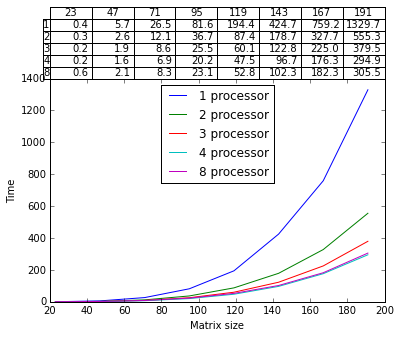

In [179]:
fig = plt.figure()
plt.xlabel("Matrix size")
plt.ylabel("Time")
table_content = []
rows = sorted(times.keys())

for processor_count in sorted(times):
    ax = fig.add_subplot(111)
    x = []
    y = []
    for key, value in sorted(times[processor_count].items()):
        x.append(key)
        y.append(value)
    plt.plot(x, y, label = ("%d processor" % processor_count))
    ax.legend(loc='upper center')
    table_content.append([round(el, 1) for el in y])
    columns = x
    
the_table = plt.table(cellText=table_content,
              rowLabels=rows,
              colLabels=columns,
              loc='top')

plt.show()

### Boost

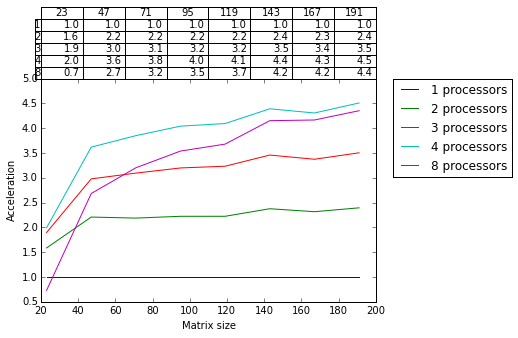

In [176]:
fig = plt.figure()
plt.xlabel("Matrix size")
plt.ylabel("Acceleration")

times_seq = times[1]
table_content = []
rows = sorted(times.keys())

for processor_count in sorted(times):
    ax = fig.add_subplot(111)
    x = []
    y = []
    for key, value in sorted(times[processor_count].items()):
        x.append(key)
        y.append(times_seq[key] / value)
    plt.plot(x, y, label = ("%d processors" % processor_count))
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    table_content.append([round(el, 1) for el in y])
    columns = x

the_table = plt.table(cellText=table_content,
              rowLabels=rows,
              colLabels=columns,
              loc='top')


plt.show()

### Efficiency

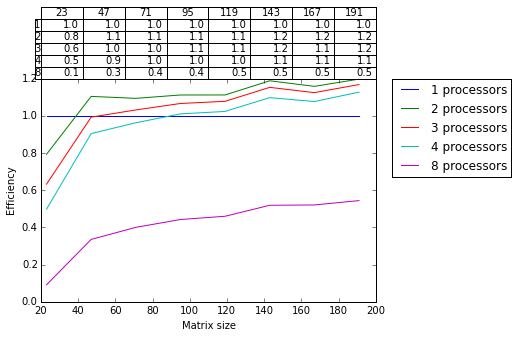

In [175]:
fig = plt.figure()
plt.xlabel("Matrix size")
plt.ylabel("Efficiency")

times_seq = times[1]
table_content = []
rows = sorted(times.keys())

for processor_count in sorted(times):
    ax = fig.add_subplot(111)
    x = []
    y = []
    for key, value in sorted(times[processor_count].items()):
        x.append(key)
        y.append((times_seq[key] / value)/processor_count)
    plt.plot(x, y, label = ("%d processors" % processor_count))
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    table_content.append([round(el, 1) for el in y])
    columns = x

the_table = plt.table(cellText=table_content,
              rowLabels=rows,
              colLabels=columns,
              loc='top')


plt.show()